# Leitura do Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
diabetes = pd.read_csv('/home/ld_brito/CinUFPE/SiDi/Projeto1/Datasets/Diabetes/Kaggle/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Verificação de variáveis nulas

In [3]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Resumo dos dados

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Existem dados indicando zero na variáveis *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* e *BMI* estão com valores zerados, o que não é comum. Logo, devemos realizar o preenchimento dessas variáveis**

## Inputação das variáveis

Para realizar o preenchimento das variáveis, é preciso primeiro transformar as variáveis zeradas em vazias

In [5]:
for variable in ['Glucose','BloodPressure','Insulin','SkinThickness','BMI']:
    diabetes.loc[diabetes[variable]==0,variable] = np.nan 

diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**O método de preenchimento escolhido foi a interpolação linear**

In [6]:
diabetes_filled = diabetes.copy()
for variable in ['Glucose','BloodPressure','Insulin','SkinThickness','BMI']:
    diabetes_filled[variable] = diabetes_filled[variable].interpolate(method="linear",limit_direction='both')

In [7]:
diabetes_filled.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**É possível notar que os valores de distribuição do conjunto preenchido é semelhante ao conjunto original sem as instâncias vazias**

In [8]:
diabetes_filled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.492839,72.330729,29.080078,158.791016,32.465365,0.471876,33.240885,0.348958
std,3.369578,30.546675,12.207864,9.887474,111.453090,6.889880,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,190.125000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Feature Selection

## Variáveis contínuas

### Teste F

                   Atributo       Score       P-valor
1                   Glucose  242.708429  9.652334e-48
5                       BMI   83.130688  6.631296e-19
7                       Age   46.140611  2.209975e-11
0               Pregnancies   39.670227  5.065127e-10
3             SkinThickness   30.744321  4.053338e-08
4                   Insulin   27.476923  2.057814e-07
6  DiabetesPedigreeFunction   23.871300  1.254607e-06
2             BloodPressure   20.346297  7.474859e-06


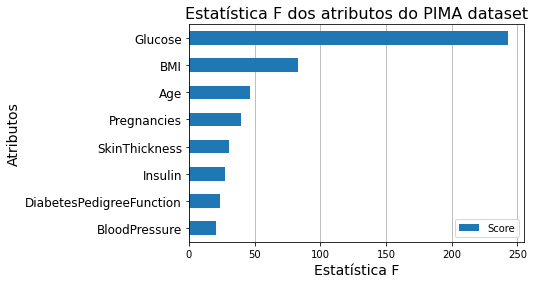

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

x = diabetes_filled.iloc[:,:-1] #Variáveis dependentes
y = diabetes_filled.iloc[:,-1] #Variável alvo

# Ajuste da função
bestfeatures_f = f_classif(x,y)

# Criação do Dataframe
dfscores_f = pd.DataFrame(bestfeatures_f[0])
dfpvalues_f = pd.DataFrame(bestfeatures_f[1])
dfcolumns_f = pd.DataFrame(x.columns)
featureScores_f = pd.concat([dfcolumns_f,dfscores_f,dfpvalues_f],axis=1)
featureScores_f.columns = ['Atributo','Score','P-valor']
# Print dos atributos com p-valor menor do que 0.01
print(featureScores_f[featureScores_f['P-valor']<0.01].sort_values('P-valor',ascending = True))

# Plot dos atributos em um gráfico de barras
featureScores_f.sort_values('Score',ascending = True).plot.barh(x = 'Atributo',y = 'Score',rot=0,zorder=2,legend=True)
plt.grid(axis='x')
plt.title("Estatística F dos atributos do PIMA dataset",fontdict={'size':16})
plt.yticks(fontsize=12)
plt.xlabel("Estatística F",fontsize=14)
plt.ylabel("Atributos",fontsize=14)
plt.show()

### Mutual Information

                   Atributo     Score
0                   Glucose  0.126474
1                       BMI  0.083510
2                       Age  0.059475
3               Pregnancies  0.032184
4                   Insulin  0.026518
5             SkinThickness  0.017242
6             BloodPressure  0.015845
7  DiabetesPedigreeFunction  0.012939


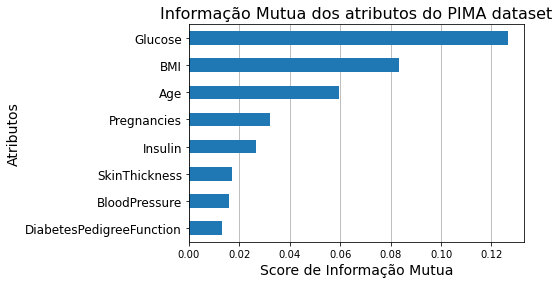

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

x = diabetes_filled.iloc[:,:-1] #Variáveis dependentes
y = diabetes_filled.iloc[:,-1] #Variável alvo

# Devido a natureza estocástica do método de aproximação dessa 
# função de mutual information para dados contínuos em relação aos discretos,
# é preciso realizar muitas repetições para obeter um resultado confiável
mean_mi=0
for i in range(1000):
    # Ajuste da função
    bestfeatures_mi = mutual_info_classif(x,y,discrete_features=False)
    mean_mi += bestfeatures_mi/1000

# Criação do Dataframe
dfscores_mi = pd.DataFrame(mean_mi)
dfcolumns_mi = pd.DataFrame(x.columns)
featureScores_mi = pd.concat([dfcolumns_mi,dfscores_mi],axis=1)
featureScores_mi.columns = ['Atributo','Score']  #nome das colunas do dataframe
# Print da tabela de Score de Mutual Information 
print(featureScores_mi.sort_values('Score',ascending = False).reset_index(drop=True))

# Plot dos atributos em um gráfico de barras
featureScores_mi.sort_values('Score',ascending = True).plot.barh(x = 'Atributo',y = 'Score',rot=0,zorder=2,legend=False)
plt.grid(axis='x')
plt.title("Informação Mutua dos atributos do PIMA dataset",fontdict={'size':16})
plt.yticks(fontsize=12)
plt.xlabel("Score de Informação Mutua",fontsize=14)
plt.ylabel("Atributos",fontsize=14)
plt.show()